Paulina Iwach-Kowalska, 254362

# Task 1

In [38]:
#!/usr/bin/env python3

import numpy as np
import pytest
from sklearn.linear_model import LinearRegression

class LinearRegr:
    def fit(self, X, Y):
        # input:
        #  X = np.array, shape = (n, m)
        #  Y = np.array, shape = (n)
        # Finds theta minimising quadratic loss function L, using an explicit formula.
        # Note: before applying the formula to X one should append to X a column with ones.
        n, m = X.shape
        X = np.column_stack((np.ones(n).reshape(n,1),X))
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ Y
        return self
    
    def predict(self, X):
        # input:
        #  X = np.array, shape = (k, m)
        # returns:
        #  Y = wektor(f(X_1), ..., f(X_k))
        n, m = X.shape
        X = np.column_stack((np.ones(n).reshape(n,1), X))
        Y = X @ self.theta
        return Y


def test_RegressionInOneDim():
    X = np.array([1,3,2,5]).reshape((4,1))
    Y = np.array([2,5, 3, 8])
    a = np.array([1,2,10]).reshape((3,1))
    expected = LinearRegression().fit(X, Y).predict(a)
    actual = LinearRegr().fit(X, Y).predict(a)
    print(expected)
    print(actual)
    assert list(actual) == pytest.approx(list(expected))

def test_RegressionInThreeDim():
    X = np.array([1,2,3,5,4,5,4,3,3,3,2,5]).reshape((4,3))
    Y = np.array([2,5, 3, 8])
    a = np.array([1,0,0, 0,1,0, 0,0,1, 2,5,7, -2,0,3]).reshape((5,3))
    expected = LinearRegression().fit(X, Y).predict(a)
    actual = LinearRegr().fit(X, Y).predict(a)
    print(expected)
    print(actual)
    assert list(actual) == pytest.approx(list(expected))

In [39]:
test_RegressionInOneDim()
test_RegressionInThreeDim()

[ 1.8         3.34285714 15.68571429]
[ 1.8         3.34285714 15.68571429]
[ 2.25 -1.75  2.75  2.    3.75]
[ 2.25 -1.75  2.75  2.    3.75]


# Task 2

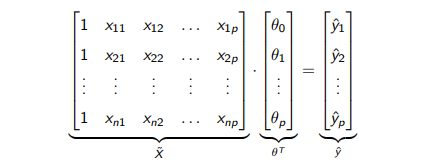


$\frac{\partial L}{\partial \theta_j} = -2 \sum_{i=1}^{n} x_{ij}(y_i - \theta_0 - \theta_1 x_{i1} - \ldots - \theta_p x_{ip}) + 2\alpha \theta_j=\\ =2 \sum_{i=1}^{n} x_{ij}(-y_i + \theta_0 + \theta_1 x_{i1} + \ldots + \theta_p x_{ip}) + 2\alpha \theta_j =\\ = 2 \sum_{i=1}^{n} x_{ij} \cdot \sum_{i=1}^{n}(-y_i + \theta_0 + \theta_1 x_{i1} + \ldots + \theta_p x_{ip}) + 2\alpha \theta_j$

$2[(X \text{@} \Theta - Y) \text{@} X] +2\alpha\Theta$

c - learning rate

In [46]:
#!/usr/bin/env python3

import numpy as np
import pytest
from sklearn.linear_model import Ridge

class RidgeRegr:
    def __init__(self, alpha = 0.0, m = 10**5, c=10**(-3)):
        self.alpha = alpha
        self.c = c
        self.m = m
        

    def fit(self, X, Y):
        # input:
        #  X = np.array, shape = (n, m)
        #  Y = np.array, shape = (n)
        # Finds theta (approximately) minimising quadratic loss function L with Ridge penalty,
        # using an iterative method.
        n, m = X.shape
        X = np.column_stack((np.ones(n).reshape(n,1), X))
        self.theta = np.zeros((m+1))
        alpha_vector = np.ones(m+1)*self.alpha
        alpha_vector[0] = 0
        for i in range(self.m):
            gradient = 2 * ( ((X @ self.theta) - Y) @ X ) + 2 * alpha_vector * self.theta
            self.theta = self.theta - self.c * gradient
        
        return self
    
    def predict(self, X):
        # input:
        #  X = np.array, shape = (k, m)
        # returns:
        #  Y = wektor(f(X_1), ..., f(X_k))
        n, m = X.shape
        X = np.column_stack((np.ones(n).reshape(n,1), X))
        Y = X @ self.theta
        return Y


def test_RidgeRegressionInOneDim():
    X = np.array([1,3,2,5]).reshape((4,1))
    Y = np.array([2,5, 3, 8])
    X_test = np.array([1,2,10]).reshape((3,1))
    alpha = 0.3
    expected = Ridge(alpha).fit(X, Y).predict(X_test)
    actual = RidgeRegr(alpha).fit(X, Y).predict(X_test)
    print(expected)
    print(actual)
    assert list(actual) == pytest.approx(list(expected), rel=1e-5)

def test_RidgeRegressionInThreeDim():
    X = np.array([1,2,3,5,4,5,4,3,3,3,2,5]).reshape((4,3))
    Y = np.array([2,5, 3, 8])
    X_test = np.array([1,0,0, 0,1,0, 0,0,1, 2,5,7, -2,0,3]).reshape((5,3))
    alpha = 0.4
    expected = Ridge(alpha).fit(X, Y).predict(X_test)
    actual = RidgeRegr(alpha).fit(X, Y).predict(X_test)
    print(expected)
    print(actual)
    assert list(actual) == pytest.approx(list(expected), rel=1e-3)
    

In [47]:
test_RidgeRegressionInOneDim()

[ 1.88950276  3.38121547 15.31491713]
[ 1.88950276  3.38121547 15.31491713]


In [48]:
test_RidgeRegressionInThreeDim()

[ 0.54685378 -1.76188321  1.58691716  5.15527388  3.66704391]
[ 0.54685378 -1.76188321  1.58691716  5.15527388  3.66704391]
